# DATA PREPARATION AND PREPROCESSING

In [2]:
#importing the required libraries and modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import warnings
warnings.filterwarnings('ignore')


In [3]:
#Loading the dataset
df = pd.read_csv("Covid Data.csv")

In [4]:
#viewing the top 10 rows of our dataset
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [7]:
#Viewing the dataset
df

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,9999-99-99,97,2,40,97,2,...,2,2,2,2,2,2,2,2,7,97
1048571,1,13,2,2,9999-99-99,2,2,51,97,2,...,2,2,1,2,2,2,2,2,7,2
1048572,2,13,2,1,9999-99-99,97,2,55,97,2,...,2,2,2,2,2,2,2,2,7,97
1048573,2,13,2,1,9999-99-99,97,2,28,97,2,...,2,2,2,2,2,2,2,2,7,97


In [8]:
#Checking duplication percentage
(df.duplicated().sum()/df.shape[0])*100

77.44310135183463

In [9]:
#print the datatype in each column
df.dtypes

USMER                    int64
MEDICAL_UNIT             int64
SEX                      int64
PATIENT_TYPE             int64
DATE_DIED               object
INTUBED                  int64
PNEUMONIA                int64
AGE                      int64
PREGNANT                 int64
DIABETES                 int64
COPD                     int64
ASTHMA                   int64
INMSUPR                  int64
HIPERTENSION             int64
OTHER_DISEASE            int64
CARDIOVASCULAR           int64
OBESITY                  int64
RENAL_CHRONIC            int64
TOBACCO                  int64
CLASIFFICATION_FINAL     int64
ICU                      int64
dtype: object

In [10]:
#count the number of missing or null values in each column
df.isnull().sum()

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
DATE_DIED               0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
dtype: int64

Checking the real status of the missing values

In [11]:
df_null = df.copy()
for i in [97, 98, 99]:
    df_null.replace(i, np.nan, inplace = True)

In [12]:
# Checking the real status of the missing values
df_null.isnull().sum()

USMER                        0
MEDICAL_UNIT                 0
SEX                          0
PATIENT_TYPE                 0
DATE_DIED                    0
INTUBED                 855869
PNEUMONIA                16003
AGE                        345
PREGNANT                527265
DIABETES                  3338
COPD                      3003
ASTHMA                    2979
INMSUPR                   3404
HIPERTENSION              3104
OTHER_DISEASE             5045
CARDIOVASCULAR            3076
OBESITY                   3032
RENAL_CHRONIC             3006
TOBACCO                   3220
CLASIFFICATION_FINAL         0
ICU                     856032
dtype: int64

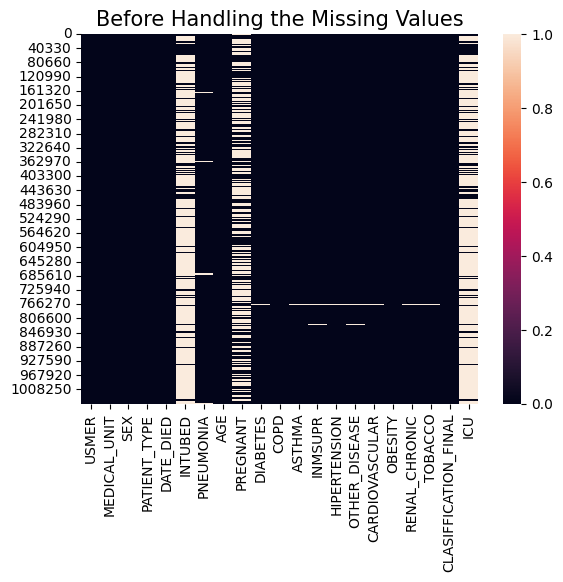

In [10]:
#create a heatmap that visually represents the presence of null values
sns.heatmap(df_null.isnull())
plt.title('Before Handling the Missing Values', color = 'black', fontsize = 15)
plt.show()

In [13]:
#Chcekc for strings in the feature "DATE_DIED"
df['DATE_DIED'][df[
    'DATE_DIED'].apply(lambda x: isinstance(x, str))]

0          03/05/2020
1          03/06/2020
2          09/06/2020
3          12/06/2020
4          21/06/2020
              ...    
1048570    9999-99-99
1048571    9999-99-99
1048572    9999-99-99
1048573    9999-99-99
1048574    9999-99-99
Name: DATE_DIED, Length: 1048575, dtype: object

In [14]:
#creating a new column in the DataFrame df named DEAD
df['DEAD'] = [0 if i=='9999-99-99' else 1 for i in df.DATE_DIED]

In [15]:
#count the frequency of each unique value in the DEAD column of the DataFrame df
df['DEAD'].value_counts()

0    971633
1     76942
Name: DEAD, dtype: int64

In [16]:
# Replace occurrences of a specific value ('9999-99-99') in the 'DATE_DIED' column of the DataFrame df with np.nan
df['DATE_DIED'].replace('9999-99-99', np.nan, inplace = True)

In [17]:
#Check the modified dataframe
df['DATE_DIED']

0          03/05/2020
1          03/06/2020
2          09/06/2020
3          12/06/2020
4          21/06/2020
              ...    
1048570           NaN
1048571           NaN
1048572           NaN
1048573           NaN
1048574           NaN
Name: DATE_DIED, Length: 1048575, dtype: object

In [18]:
# convert the 'DATE_DIED' column in a pandas DataFrame df to datetime objects
df['DATE_DIED'] = pd.to_datetime(df['DATE_DIED'])

In [19]:
#Check the modified dataframe
df['DATE_DIED']

0         2020-03-05
1         2020-03-06
2         2020-09-06
3         2020-12-06
4         2020-06-21
             ...    
1048570          NaT
1048571          NaT
1048572          NaT
1048573          NaT
1048574          NaT
Name: DATE_DIED, Length: 1048575, dtype: datetime64[ns]

In [20]:
#count the number of missing or null values in the 'DATE_DIED' column
df['DATE_DIED'].isnull().sum()

971633

In [21]:
#summary of the DataFrame df
df.describe().round(3).T.drop('count', axis = 1)

,mean,std,min,25%,50%,75%,max
USMER,1.632,0.482,1.0,1.0,2.0,2.0,2.0
MEDICAL_UNIT,8.981,3.723,1.0,4.0,12.0,12.0,13.0
SEX,1.499,0.500,1.0,1.0,1.0,2.0,2.0
PATIENT_TYPE,1.191,0.393,1.0,1.0,1.0,1.0,2.0
INTUBED,79.523,36.869,1.0,97.0,97.0,97.0,99.0
PNEUMONIA,3.347,11.913,1.0,2.0,2.0,2.0,99.0
AGE,41.794,16.907,0.0,30.0,40.0,53.0,121.0
PREGNANT,49.766,47.511,1.0,2.0,97.0,97.0,98.0
DIABETES,2.186,5.424,1.0,2.0,2.0,2.0,98.0
COPD,2.261,5.132,1.0,2.0,2.0,2.0,98.0


In [22]:
#count the number of entries in the 'AGE' column in the dataFrame df where the age values are greater than 110
df['AGE'][df['AGE']> 110].value_counts().sum()

22

In [23]:
#Count the values
df.SEX.value_counts()

1    525064
2    523511
Name: SEX, dtype: int64

In [24]:
#eturns the tuple
df.SEX.shape

(1048575,)

In [25]:
#include only those rows where the value in the 'SEX' column is 1
df[(df['SEX'] ==1)].shape

(525064, 22)

In [52]:
#include only those rows where the 'SEX' column has a value of 1, and then selects the 'PREGNANT'
df[(df['SEX'] == 1)]['PREGNANT']

0          2.0
3          2.0
5          2.0
6          2.0
7          2.0
          ... 
1048563    2.0
1048564    2.0
1048565    2.0
1048567    2.0
1048569    2.0
Name: PREGNANT, Length: 525064, dtype: float64

In [53]:
#Counts the total number of pregant women
df[(df['SEX'] == 1)]['PREGNANT'].value_counts()

2.0    513179
1.0      8131
Name: PREGNANT, dtype: int64

In [28]:
#total females
513179+8131+3754

525064

In [29]:
# Males count in 'PREGNANT' column
df[(df['SEX'] == 2)]['PREGNANT']

1          97
2          97
4          97
11         97
12         97
           ..
1048570    97
1048571    97
1048572    97
1048573    97
1048574    97
Name: PREGNANT, Length: 523511, dtype: int64

In [30]:
#count the values in the 'PREGNANT' column where 'SEX' is male
df[(df['SEX'] == 2) & (df['PREGNANT'])]['PREGNANT'].value_counts()

97    523511
Name: PREGNANT, dtype: int64

In [31]:
#Total count of values in the pregnant column
df['PREGNANT'].value_counts()

97    523511
2     513179
1       8131
98      3754
Name: PREGNANT, dtype: int64

In [32]:
#replace all the corresponding values to the male section (97) with (2);
df['PREGNANT'].replace (97, 2, inplace = True)

In [33]:
#Count the modified values
df['PREGNANT'].value_counts()

2     1036690
1        8131
98       3754
Name: PREGNANT, dtype: int64

In [34]:
# count the frequency of each unique value in the 'ICU' column 
df.ICU.value_counts()

97    848544
2     175685
1      16858
99      7488
Name: ICU, dtype: int64

In [35]:
for i in [1, 2, 97, 99]:
    for j in [1, 2]:
        print(f"At PATIENT_TYPE = {j} and at ICU = {i} the shape will be:", "\n")
        print(df[(df['PATIENT_TYPE'] == j) & (df['ICU'] == i)].shape, "\n", "\n\n")

At PATIENT_TYPE = 1 and at ICU = 1 the shape will be: 

(0, 22) 
 


At PATIENT_TYPE = 2 and at ICU = 1 the shape will be: 

(16858, 22) 
 


At PATIENT_TYPE = 1 and at ICU = 2 the shape will be: 

(0, 22) 
 


At PATIENT_TYPE = 2 and at ICU = 2 the shape will be: 

(175685, 22) 
 


At PATIENT_TYPE = 1 and at ICU = 97 the shape will be: 

(848544, 22) 
 


At PATIENT_TYPE = 2 and at ICU = 97 the shape will be: 

(0, 22) 
 


At PATIENT_TYPE = 1 and at ICU = 99 the shape will be: 

(0, 22) 
 


At PATIENT_TYPE = 2 and at ICU = 99 the shape will be: 

(7488, 22) 
 




From the analysis, it's evident that all instances of missing values (coded as 97) in the dataset correspond to patients who were not hospitalized (indicated by PATIENT_TYPE = 1). Similarly, the missing values represented by code 99 are associated with hospitalized patients. In both cases, these missing values cannot be determined or predicted based on the available data.

In [36]:
#Replace all occurrences of the value 97 with 2 in the relevant column, as it is clear that patients who were not hospitalized (indicated by 97) could not have been admitted to the ICU.
df['ICU'].replace (97, 2, inplace = True)

In [37]:
#Count the values in the modified df
df.ICU.value_counts()

2     1024229
1       16858
99       7488
Name: ICU, dtype: int64

In [38]:
#count the frequency of each value in the 'INTUBED' column
df.INTUBED.value_counts()

97    848544
2     159050
1      33656
99      7325
Name: INTUBED, dtype: int64

In [39]:
for i in [1, 2, 97, 99]:
    for j in [1, 2]:
        print (f"At PATIENT_TYPE = {j} and at INTUBED = {i} the shape will be:", "\n")
        print (df[(df['PATIENT_TYPE'] == j) & (df['INTUBED'] == i)].shape, "\n", "\n\n")

At PATIENT_TYPE = 1 and at INTUBED = 1 the shape will be: 

(0, 22) 
 


At PATIENT_TYPE = 2 and at INTUBED = 1 the shape will be: 

(33656, 22) 
 


At PATIENT_TYPE = 1 and at INTUBED = 2 the shape will be: 

(0, 22) 
 


At PATIENT_TYPE = 2 and at INTUBED = 2 the shape will be: 

(159050, 22) 
 


At PATIENT_TYPE = 1 and at INTUBED = 97 the shape will be: 

(848544, 22) 
 


At PATIENT_TYPE = 2 and at INTUBED = 97 the shape will be: 

(0, 22) 
 


At PATIENT_TYPE = 1 and at INTUBED = 99 the shape will be: 

(0, 22) 
 


At PATIENT_TYPE = 2 and at INTUBED = 99 the shape will be: 

(7325, 22) 
 




In [40]:
#replace all the values of (97) with (2); since obviously patients who have never been hospitalized couldn't possibly be admitted to the ventilator
df['INTUBED'].replace (97, 2, inplace = True)

In [41]:
#Count the values in the modified df
df.INTUBED.value_counts()

2     1007594
1       33656
99       7325
Name: INTUBED, dtype: int64

In [42]:
for i in [98, 99]:
    df.replace(i, np.nan, inplace = True)

In [43]:
#summary of the df
df

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DEAD
0,2,1,1,1,2020-03-05,2.0,1.0,65.0,2.0,2.0,...,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3,2.0,1
1,2,1,2,1,2020-03-06,2.0,1.0,72.0,2.0,2.0,...,2.0,1.0,2.0,2.0,1.0,1.0,2.0,5,2.0,1
2,2,1,2,2,2020-09-06,1.0,2.0,55.0,2.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3,2.0,1
3,2,1,1,1,2020-12-06,2.0,2.0,53.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7,2.0,1
4,2,1,2,1,2020-06-21,2.0,2.0,68.0,2.0,1.0,...,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,NaT,2.0,2.0,40.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7,2.0,0
1048571,1,13,2,2,NaT,2.0,2.0,51.0,2.0,2.0,...,2.0,1.0,2.0,2.0,2.0,2.0,2.0,7,2.0,0
1048572,2,13,2,1,NaT,2.0,2.0,55.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7,2.0,0
1048573,2,13,2,1,NaT,2.0,2.0,28.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7,2.0,0


In [44]:
# let's undo the changes we made to the "DATE_DIED" attribute, as the values we identified as missing are actually not missing
df_null2 = df.copy()
df_null2.DATE_DIED = df_null2.DATE_DIED.fillna("9999-99-99")

In [45]:
#Count the null values
df_null2.isnull().sum()

USMER                       0
MEDICAL_UNIT                0
SEX                         0
PATIENT_TYPE                0
DATE_DIED                   0
INTUBED                  7325
PNEUMONIA               16003
AGE                       210
PREGNANT                 3754
DIABETES                 3338
COPD                     3003
ASTHMA                   2979
INMSUPR                  3404
HIPERTENSION             3104
OTHER_DISEASE            5045
CARDIOVASCULAR           3076
OBESITY                  3032
RENAL_CHRONIC            3006
TOBACCO                  3220
CLASIFFICATION_FINAL        0
ICU                      7488
DEAD                        0
dtype: int64

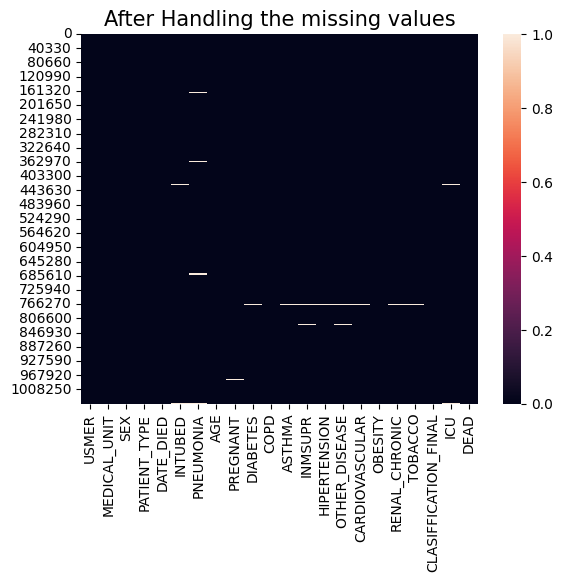

In [46]:
sns.heatmap(df_null2.isnull())
plt.title('After Handling the missing values', color = 'black', fontsize = 15)
plt.show()

In [47]:
## Create a summary of the data, with each statistic rounded to 3 decimals.
df.describe().round(3).T.drop('count', axis = 1)

,mean,std,min,25%,50%,75%,max
USMER,1.632,0.482,1.0,1.0,2.0,2.0,2.0
MEDICAL_UNIT,8.981,3.723,1.0,4.0,12.0,12.0,13.0
SEX,1.499,0.500,1.0,1.0,1.0,2.0,2.0
PATIENT_TYPE,1.191,0.393,1.0,1.0,1.0,1.0,2.0
INTUBED,1.968,0.177,1.0,2.0,2.0,2.0,2.0
PNEUMONIA,1.864,0.342,1.0,2.0,2.0,2.0,2.0
AGE,41.783,16.890,0.0,30.0,40.0,53.0,121.0
PREGNANT,1.992,0.088,1.0,2.0,2.0,2.0,2.0
DIABETES,1.880,0.324,1.0,2.0,2.0,2.0,2.0
COPD,1.986,0.119,1.0,2.0,2.0,2.0,2.0


In [56]:
for i in df.columns:
    if(i!='AGE' and i!='DATE_DIED'):
        print(i, "->", dict(df[i].value_counts())

USMER -> {2: 662903, 1: 385672}
MEDICAL_UNIT -> {12: 602995, 4: 314405, 6: 40584, 9: 38116, 3: 19175, 8: 10399, 10: 7873, 5: 7244, 11: 5577, 13: 996, 7: 891, 2: 169, 1: 151}
SEX -> {1: 525064, 2: 523511}
PATIENT_TYPE -> {1: 848544, 2: 200031}
INTUBED -> {2.0: 1007594, 1.0: 33656}
PNEUMONIA -> {2.0: 892534, 1.0: 140038}
PREGNANT -> {2.0: 1036690, 1.0: 8131}
DIABETES -> {2.0: 920248, 1.0: 124989}
COPD -> {2.0: 1030510, 1.0: 15062}
ASTHMA -> {2.0: 1014024, 1.0: 31572}
INMSUPR -> {2.0: 1031001, 1.0: 14170}
HIPERTENSION -> {2.0: 882742, 1.0: 162729}
OTHER_DISEASE -> {2.0: 1015490, 1.0: 28040}
CARDIOVASCULAR -> {2.0: 1024730, 1.0: 20769}
OBESITY -> {2.0: 885727, 1.0: 159816}
RENAL_CHRONIC -> {2.0: 1026665, 1.0: 18904}
TOBACCO -> {2.0: 960979, 1.0: 84376}
CLASIFFICATION_FINAL -> {7: 499250, 3: 381527, 6: 128133, 5: 26091, 1: 8601, 4: 3122, 2: 1851}
ICU -> {2.0: 1024229, 1.0: 16858}
DEAD -> {0: 971633, 1: 76942}


In [48]:
#viewing the dataset
df

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DEAD
0,2,1,1,1,2020-03-05,2.0,1.0,65.0,2.0,2.0,...,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3,2.0,1
1,2,1,2,1,2020-03-06,2.0,1.0,72.0,2.0,2.0,...,2.0,1.0,2.0,2.0,1.0,1.0,2.0,5,2.0,1
2,2,1,2,2,2020-09-06,1.0,2.0,55.0,2.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3,2.0,1
3,2,1,1,1,2020-12-06,2.0,2.0,53.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7,2.0,1
4,2,1,2,1,2020-06-21,2.0,2.0,68.0,2.0,1.0,...,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,NaT,2.0,2.0,40.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7,2.0,0
1048571,1,13,2,2,NaT,2.0,2.0,51.0,2.0,2.0,...,2.0,1.0,2.0,2.0,2.0,2.0,2.0,7,2.0,0
1048572,2,13,2,1,NaT,2.0,2.0,55.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7,2.0,0
1048573,2,13,2,1,NaT,2.0,2.0,28.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7,2.0,0


In [51]:
# Assuming your cleaned dataset is in a DataFrame named 'cleaned_df'
df.to_csv('cleaned_dataset.csv', index=False)
